<div style="display: flex; flex-direction: column; align-items: center; justify-content: center; height: 80vh; padding-top: 40px;">

  <h1 style="font-size: 50px; color: #e50914; font-family: Arial, sans-serif; margin-bottom: 20px;">
    Netflix Analysis
  </h1>

  <img src="https://gamecardsdirect.com/content/picture/35970/netflix-25-euro-de-incomm.webp"
       alt="Netflix Gift Card"
       width="400"
       style="border-radius: 12px; box-shadow: 0 4px 12px rgba(0,0,0,0.3);">

</div>


In [3]:
# Required Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('netflix_titles.csv')

Just some Samples from the Netflix Dataset in a colorful way

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
# Show all columns
pd.set_option('display.max_columns', None)

# Take 5 random rows
sample_df = df.sample(5, random_state=42)

# Style it clean and compact
styled_df = sample_df.style \
    .set_caption("🎬 Netflix Dataset — Compact 5-Row Preview") \
    .set_properties(**{
        'text-align': 'center',
        'font-family': 'Arial',
        'font-size': '12px',
        'padding': '4px'
    }) \
    .set_table_styles([
        {
            'selector': 'th',
            'props': [
                ('background-color', '#e50914'),
                ('color', 'white'),
                ('font-size', '13px'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'caption',
            'props': [
                ('caption-side', 'top'),
                ('font-size', '16px'),
                ('color', '#e50914'),
                ('padding-bottom', '10px')
            ]
        }
    ]) \
    .background_gradient(cmap='RdPu', axis=None)

# Display
styled_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4970,s4971,Movie,"Game Over, Man!",Kyle Newacheck,"Adam DeVine, Anders Holm, Blake Anderson, Utkarsh Ambudkar, Aya Cash, Neal McDonough, Daniel Stern, Jamie Demetriou, Rhona Mitra, Sam Richardson, Steve Howey, Mac Brandt, Geno Segers, Roe Hartrampf",United States,"March 23, 2018",2018,TV-MA,102 min,"Action & Adventure, Comedies",Three buddies with big dreams go from underachieving slackers to badass warriors when their posh hotel is taken over by terrorists.
3362,s3363,Movie,Arsenio Hall: Smart & Classy,Brian Volk-Weiss,Arsenio Hall,United States,"October 29, 2019",2019,TV-MA,63 min,Stand-Up Comedy,"In his first stand-up special, Arsenio Hall discusses getting older, the changing times and culture, social issues and even bothersome baby toes."
5494,s5495,TV Show,Kazoops!,nan,"Reece Pockney, Scott Langley, Alex Babic, Gemma Harvey, Jessica Hann, Emma Tate",Australia,"May 5, 2017",2017,TV-Y,3 Seasons,Kids' TV,Music meets imagination in this inventive animated series about thinking outside the box and having fun.
1688,s1689,TV Show,We Are the Champions,nan,nan,United States,"November 17, 2020",2020,TV-MA,1 Season,"Docuseries, Reality TV","Explore an array of unique competitions, from the quirky to the bizarre, and meet their passionate communities in this docuseries."
1349,s1350,TV Show,"Pablo Escobar, el patrón del mal",nan,"Andrés Parra, Angie Cepeda, Cecilia Navia, Vicky Hernández, Christian Tappan, Rodolfo Silva, Tommy Vásquez, Toto Vega, Nicolás Montero, Marcela Gallego",Colombia,"February 3, 2021",2012,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanish-Language TV Shows","From his days as a petty thief to becoming head of a drug-trafficking empire, this riveting series charts the life of the infamous Pablo Escobar."


Data Cleaning

In [13]:
# Convert date_added to datetime (safe version)
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

# Fill missing values in other columns
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')

# Drop rows where date_added is still invalid (optional but safe)
df = df.dropna(subset=['date_added'])

# Extract year and month from the cleaned date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Check final structure and nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8709 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8709 non-null   object        
 1   type          8709 non-null   object        
 2   title         8709 non-null   object        
 3   director      8709 non-null   object        
 4   cast          7892 non-null   object        
 5   country       8709 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8709 non-null   int64         
 8   rating        8705 non-null   object        
 9   duration      8706 non-null   object        
 10  listed_in     8709 non-null   object        
 11  description   8709 non-null   object        
 12  year_added    8709 non-null   int32         
 13  month_added   8709 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 952.5+ KB


<ipython-input-13-4aac6e31ad96>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_added'] = df['date_added'].dt.year
<ipython-input-13-4aac6e31ad96>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_added'] = df['date_added'].dt.month


 Content Freshness by **Country**

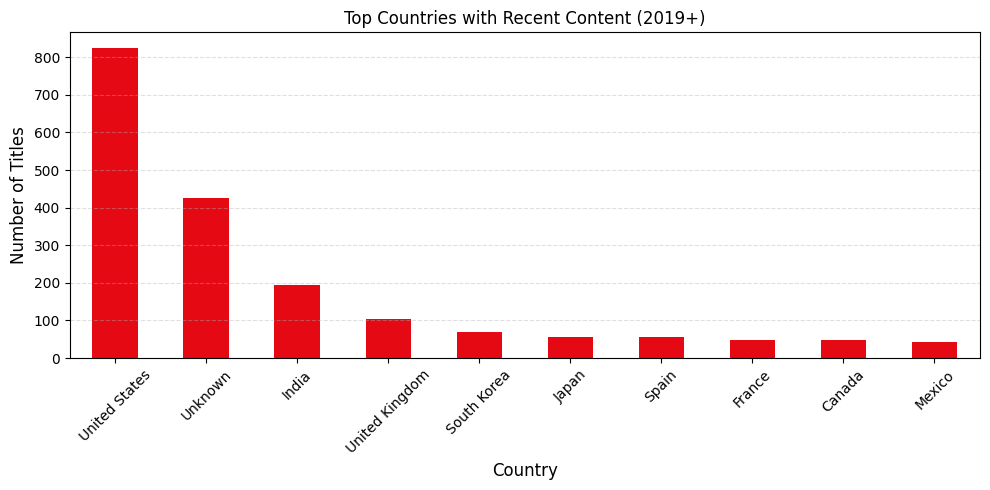

In [17]:
import matplotlib.pyplot as plt

# Filter recent content
recent = df[df['release_year'] >= 2019]

# Count by country
top_countries = recent['country'].value_counts().head(10)

# Plot with Netflix red
plt.figure(figsize=(10, 5))
top_countries.plot(
    kind='bar',
    color='#e50914',
    title='Top Countries with Recent Content (2019+)'
)

# Labeling
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Content Additions by Month (Seasonality)**

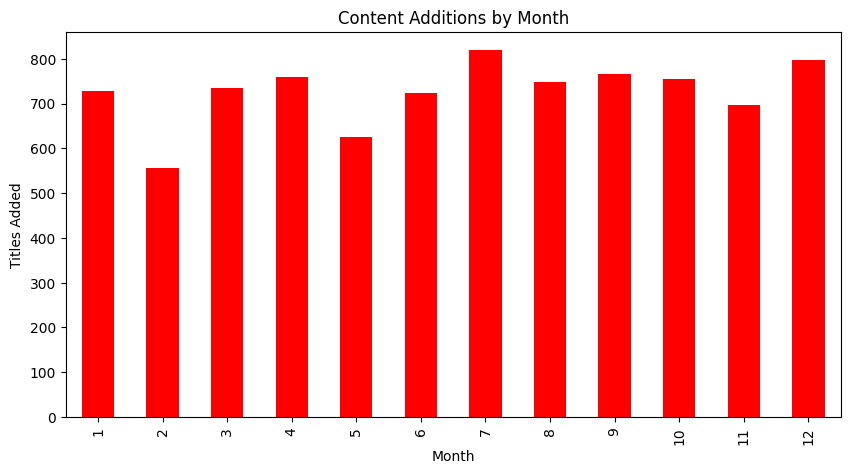

In [19]:
# Count content added by month
monthly_counts = df['month_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,5))
monthly_counts.plot(kind='bar', color='red', title='Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Titles Added')
plt.show()


**Most Dominant Genres**

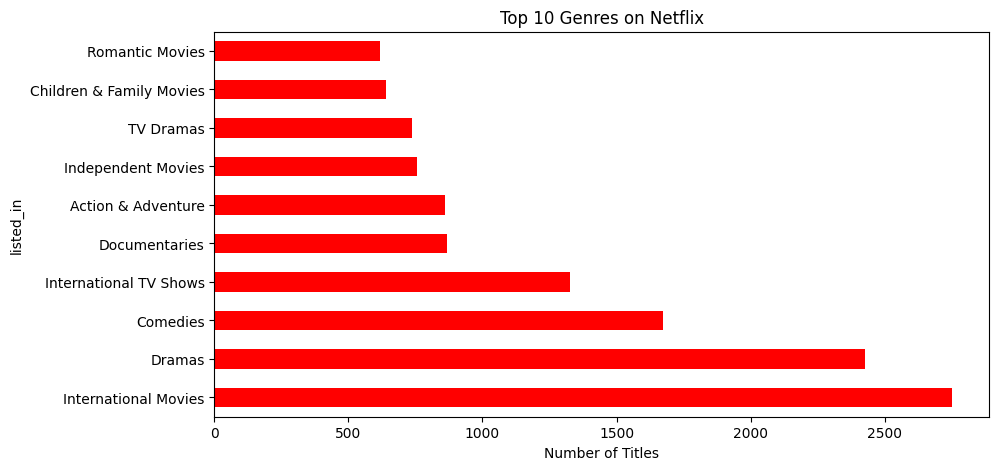

In [22]:
# Split and explode genres
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_genres.plot(kind='barh', color='red',title='Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


**Underrepresented Countriest**

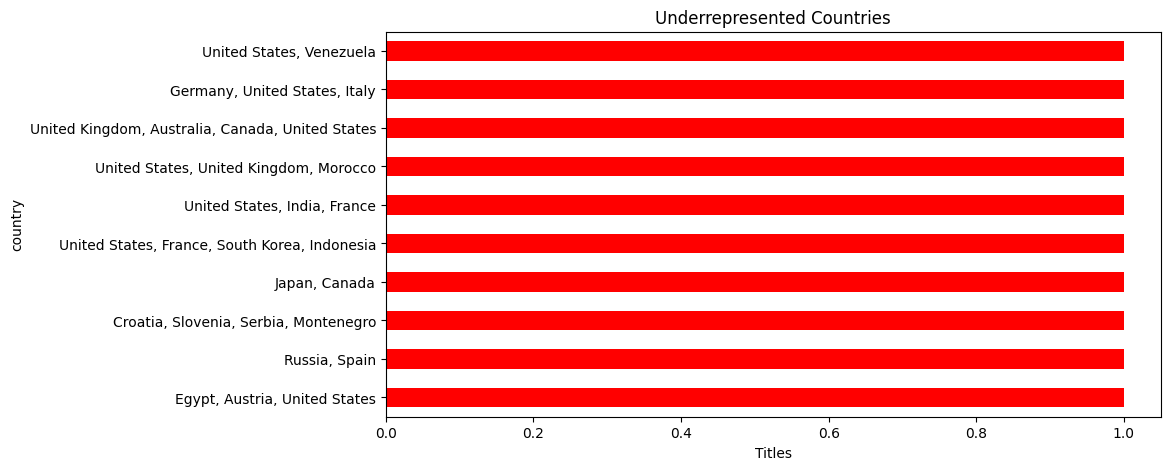

In [23]:
country_counts = df['country'].value_counts()
low_content = country_counts[country_counts < 20].tail(10)

# Plot
plt.figure(figsize=(10,5))
low_content.plot(kind='barh',color='red', title='Underrepresented Countries')
plt.xlabel('Titles')
plt.show()


**Top Directors by Volume**

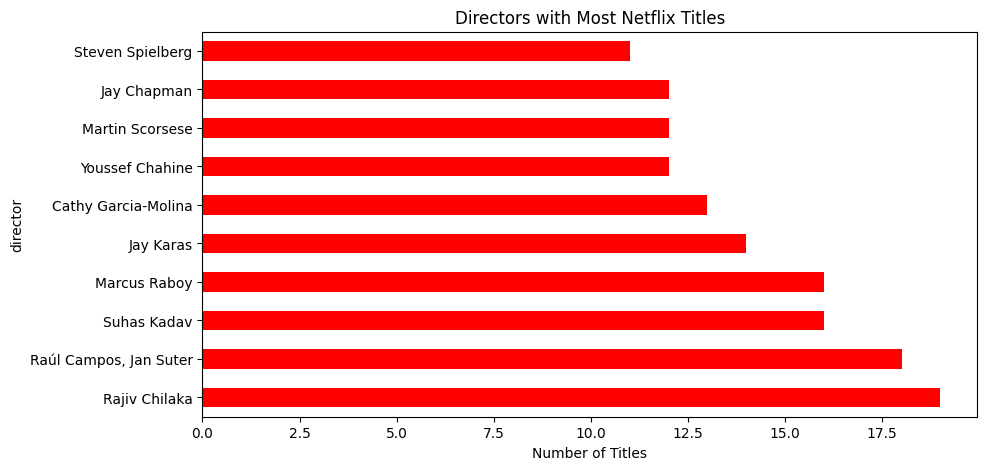

In [25]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
top_directors.plot(kind='barh',color='red', title='Directors with Most Netflix Titles')
plt.xlabel('Number of Titles')
plt.show()
